<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 4</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 31, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME:
KHANH TRAN- gpt32

### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of data wrangling in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be at least 11 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comments.
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
3. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

#### Question 1:

Download the dataset: `loan-applications.csv` and load it into a data frame. The data set contains several hundreds of loan application data. This data set provides a glimse of what bank and insurance companies facing during their data analyses. The goal is to automate the loan application process based on applicants' information. This data set contains many features of applicants, including: `Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others`. The main problem is that the data set contains missing values and different types of data. Here, you are asked to write code to clean and visualize the data and answer the following questions:
1. List the number of missing values for each column.
2. Remove the applications each of which has more than 2 missing values.
3. Forward fill up the missing values for columns with Object data type.
4. Fill up the missing values with their means for columns with numerical data types.
5. After the above steps, show that there are no missing data in the DataFrame.
6. Plot the relationship between Education and ApplicantIncome.
7. Plot the relationship between Property_Area and Loan_Status.
8. Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000).
9. Plot the relationship between Loan_Status and the categories of ApplicantIncome.
10. Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).
11. Plot the relationship between Loan_Status and the categories of CoapplicantIncome. 
12. Develop plots to show the relationships between Load_Status and Education, Married, Credit_History. 
13. For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical categorical representations.

In [270]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a dataframe
loan = pd.read_csv("loan-applications.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [244]:
# 1. List the number of missing values for each column.

loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [245]:
# 2. Remove the applications each of which has more than 2 missing values.

loan = loan.dropna(thresh=(len(loan.columns)-2))
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [246]:
# 3. Forward fill up the missing values for columns with Object data type.

# A list of data types of all columns
dt = loan.dtypes.tolist()

for index, dtype in enumerate(dt):
    if dtype == loan.dtypes[0]: # If data type is Object
        loan.iloc[:,index].fillna(method='ffill', inplace=True)

loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [247]:
# 4. Fill up the missing values with their means for columns with numerical data types.

for index, dtype in enumerate(dt):
    if dtype != loan.dtypes[0]: # If data type is not Object
        loan.iloc[:,index].fillna(loan.iloc[:,index].mean(), inplace=True)

loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [248]:
# 5. After the above steps, show that there are no missing data in the DataFrame.

loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

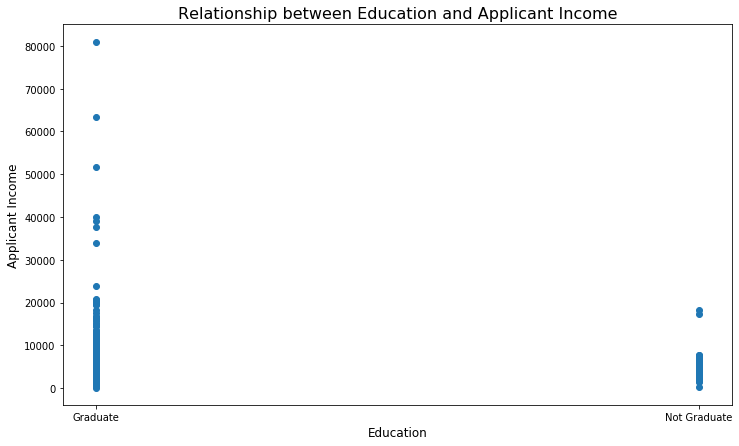

In [249]:
# 6. Plot the relationship between Education and ApplicantIncome.

plt.figure(figsize=(12,7))
plt.scatter(loan["Education"], loan["ApplicantIncome"])
plt.xlabel("Education", size=12)
plt.ylabel("Applicant Income", size=12)
plt.title("Relationship between Education and Applicant Income", size=16)
plt.autoscale(tight=False)


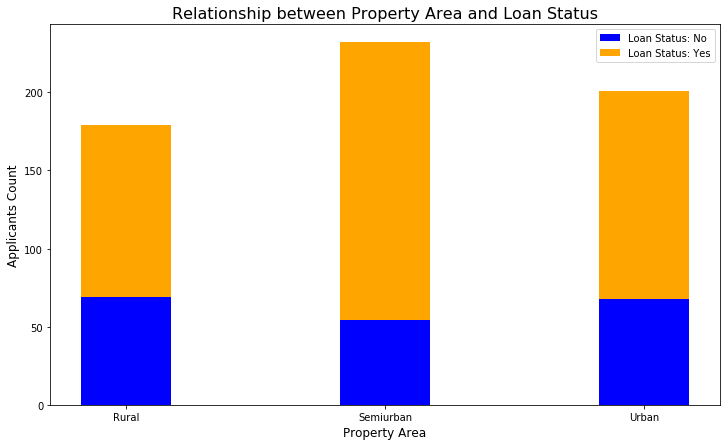

In [250]:
# 7. Plot the relationship between Property_Area and Loan_Status.

# A new dataframe with Property_Area, Loan_Status and Count using .groupby()
prop_status = loan.groupby(["Property_Area", "Loan_Status"]).size().reset_index(name="Count")

# Plotting
ticks = ['Rural', 'Semiurban', 'Urban']
yes = [prop_status["Count"][1], prop_status["Count"][3], prop_status["Count"][5]]
no = [prop_status["Count"][0], prop_status["Count"][2], prop_status["Count"][4]]
ind = [0,1,2]    # the x locations for the groups
width=0.35       # the width of the bars
plt.figure(figsize=(12,7))

p1 = plt.bar(ind, no, width, color='blue')          # First stack
p2 = plt.bar(ind, yes, width, bottom=no, color='orange') # Second stack

plt.xticks(ind, ticks) # Set ticks for x axis
plt.xlabel("Property Area", size=12)
plt.ylabel("Applicants Count", size=12)
plt.title("Relationship between Property Area and Loan Status", size=16)
plt.legend((p1[0], p2[0]), ("Loan Status: No", "Loan Status: Yes"))
plt.autoscale(tight=False)


In [251]:
# 8. Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000),
# and Rich(>50000).

loan['ApplicantIncome'] = pd.cut(
                                loan['ApplicantIncome'], 
                                bins=[0, 2000, 20000, 50000, 10000000], 
                                include_lowest=True, labels=['low', 'medium', 'High', 'Rich']
                                )

In [252]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,medium,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,medium,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,medium,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,medium,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,medium,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,medium,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,medium,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,medium,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,medium,0.0,187.000000,360.0,1.0,Urban,Y


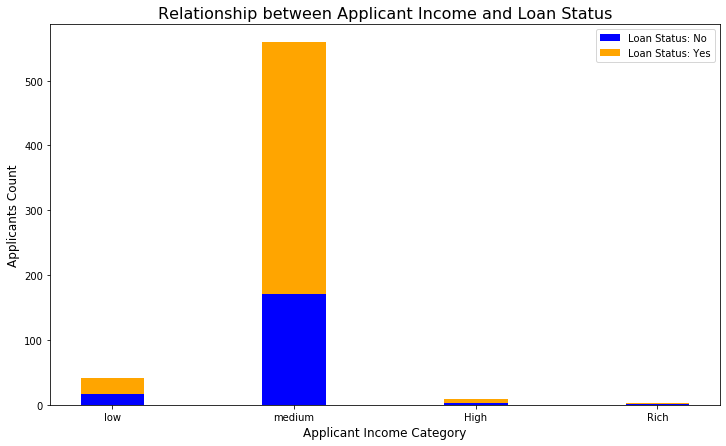

In [253]:
# 9. Plot the relationship between Loan_Status and the categories of ApplicantIncome.

income_status = loan.groupby(["ApplicantIncome", "Loan_Status"]).size().reset_index(name="Count")

# Plotting
ticks = ['low', 'medium', 'High', 'Rich']
yes = [income_status["Count"][1], income_status["Count"][3], 
       income_status["Count"][5], income_status["Count"][7]]
no = [income_status["Count"][0], income_status["Count"][2], 
      income_status["Count"][4], income_status["Count"][6]]
ind = [0,1,2,3]    
width=0.35       
plt.figure(figsize=(12,7))

p1 = plt.bar(ind, no, width, color='blue')          
p2 = plt.bar(ind, yes, width, bottom=no, color='orange') 

plt.xticks(ind, ticks) 
plt.xlabel("Applicant Income Category", size=12)
plt.ylabel("Applicants Count", size=12)
plt.title("Relationship between Applicant Income and Loan Status", size=16)
plt.legend((p1[0], p2[0]), ("Loan Status: No", "Loan Status: Yes"))
plt.autoscale(tight=False)

In [254]:
# 10. Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), 
# High(10000-20000), and Rich(>20000).

loan['CoapplicantIncome'] = pd.cut(
                                    loan['CoapplicantIncome'], 
                                    bins=[0, 2000, 10000, 20000, 100000000], 
                                    include_lowest=True, labels=['low', 'medium', 'High', 'Rich']
                                  )

In [255]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,medium,low,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,medium,low,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,medium,low,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,medium,medium,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,medium,low,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,medium,low,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,medium,low,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,medium,low,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,medium,low,187.000000,360.0,1.0,Urban,Y


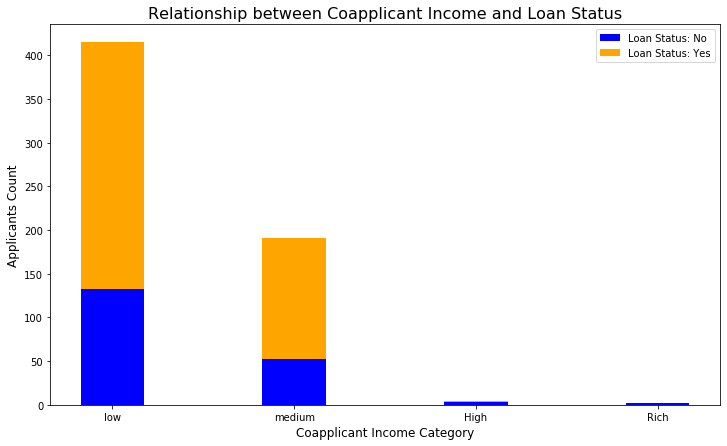

In [256]:
# 11. Plot the relationship between Loan_Status and the categories of CoapplicantIncome.

coincome_status = loan.groupby(["CoapplicantIncome", "Loan_Status"]).size().reset_index(name="Count")

# Plotting
ticks = ['low', 'medium', 'High', 'Rich']
yes = [coincome_status["Count"][1], coincome_status["Count"][3], 
       coincome_status["Count"][5], 0]
no = [coincome_status["Count"][0], coincome_status["Count"][2], 
      coincome_status["Count"][4], coincome_status["Count"][6]]
ind = [0,1,2,3]    
width=0.35       
plt.figure(figsize=(12,7))

p1 = plt.bar(ind, no, width, color='blue')          
p2 = plt.bar(ind, yes, width, bottom=no, color='orange') 

plt.xticks(ind, ticks) 
plt.xlabel("Coapplicant Income Category", size=12)
plt.ylabel("Applicants Count", size=12)
plt.title("Relationship between Coapplicant Income and Loan Status", size=16)
plt.legend((p1[0], p2[0]), ("Loan Status: No", "Loan Status: Yes"))
plt.autoscale(tight=False)

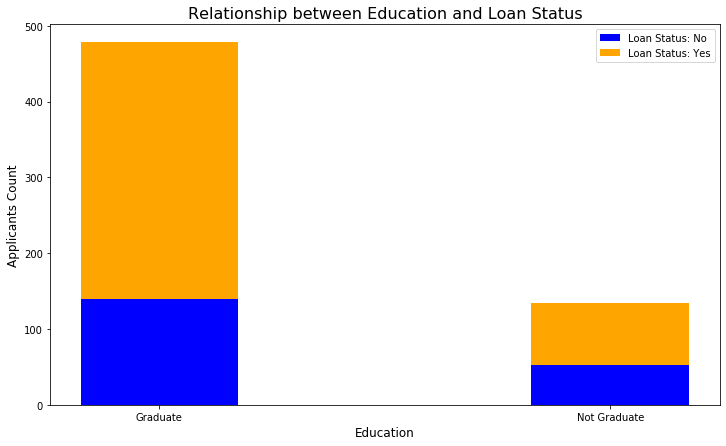

In [257]:
# 12. Develop plots to show the relationships between Load_Status and Education, Married, 
# Credit_History.

# Education and Loan Status dataframe
edu_status = loan.groupby(["Education", "Loan_Status"]).size().reset_index(name="Count")

# Plotting
ticks = ['Graduate', 'Not Graduate']
yes = [edu_status["Count"][1], edu_status["Count"][3]]
no = [edu_status["Count"][0], edu_status["Count"][2]]
ind = [0,1]    
width=0.35       
plt.figure(figsize=(12,7))

p1 = plt.bar(ind, no, width, color='blue')          
p2 = plt.bar(ind, yes, width, bottom=no, color='orange') 

plt.xticks(ind, ticks) 
plt.xlabel("Education", size=12)
plt.ylabel("Applicants Count", size=12)
plt.title("Relationship between Education and Loan Status", size=16)
plt.legend((p1[0], p2[0]), ("Loan Status: No", "Loan Status: Yes"))
plt.autoscale(tight=False)

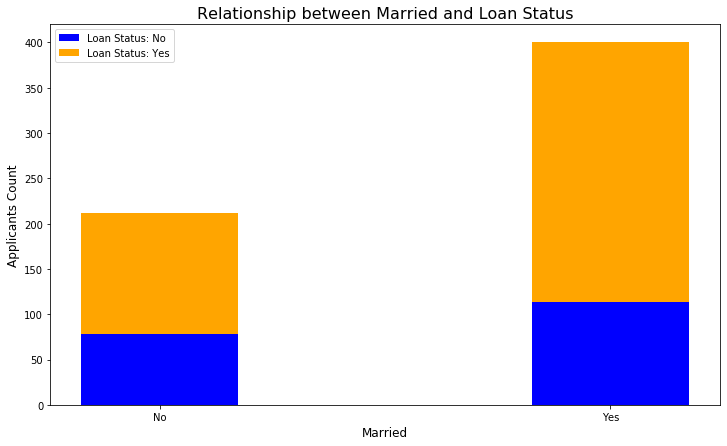

In [258]:
# Married and Loan Status dataframe
marr_status = loan.groupby(["Married", "Loan_Status"]).size().reset_index(name="Count")

# Plotting
ticks = ['No', 'Yes']
yes = [marr_status["Count"][1], marr_status["Count"][3]]
no = [marr_status["Count"][0], marr_status["Count"][2]]
ind = [0,1]    
width=0.35       
plt.figure(figsize=(12,7))

p1 = plt.bar(ind, no, width, color='blue')          
p2 = plt.bar(ind, yes, width, bottom=no, color='orange') 

plt.xticks(ind, ticks) 
plt.xlabel("Married", size=12)
plt.ylabel("Applicants Count", size=12)
plt.title("Relationship between Married and Loan Status", size=16)
plt.legend((p1[0], p2[0]), ("Loan Status: No", "Loan Status: Yes"))
plt.autoscale(tight=False)

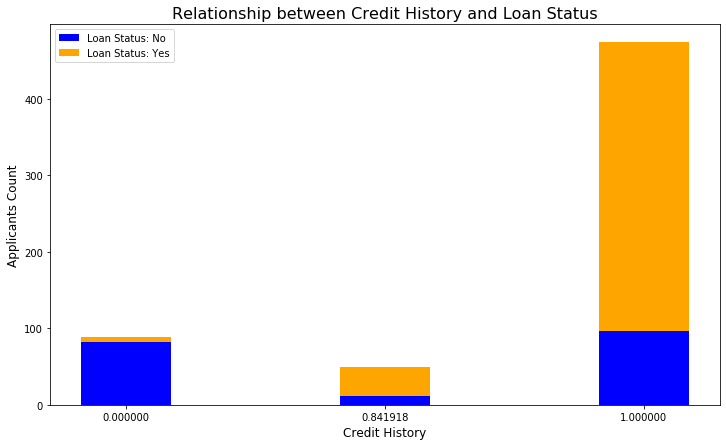

In [259]:
# Credit History and Loan Status dataframe
cred_status = loan.groupby(["Credit_History", "Loan_Status"]).size().reset_index(name="Count")

# Plotting
ticks = ['0.000000', '0.841918', '1.000000']
yes = [cred_status["Count"][1], cred_status["Count"][3], cred_status["Count"][5]]
no = [cred_status["Count"][0], cred_status["Count"][2], cred_status["Count"][4]]
ind = [0,1,2]    
width=0.35       
plt.figure(figsize=(12,7))

p1 = plt.bar(ind, no, width, color='blue')          
p2 = plt.bar(ind, yes, width, bottom=no, color='orange') 

plt.xticks(ind, ticks) 
plt.xlabel("Credit History", size=12)
plt.ylabel("Applicants Count", size=12)
plt.title("Relationship between Credit History and Loan Status", size=16)
plt.legend((p1[0], p2[0]), ("Loan Status: No", "Loan Status: Yes"))
plt.autoscale(tight=False)

In [260]:
# 13. For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical 
# categorical representations.

loan.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome      category
CoapplicantIncome    category
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [261]:
# Replacing non-numerical data with numerical categorical representations
loan["Gender"] = loan["Gender"].map({"Female":0,"Male":1})
loan["Married"] = loan["Married"] = loan["Married"].map({"No":0, "Yes":1})
loan["Education"] = loan["Education"].map({"Not Graduate":0,"Graduate":1})
loan["Self_Employed"] = loan["Self_Employed"].map({"No":0, "Yes":1})
loan["ApplicantIncome"] = loan["ApplicantIncome"].map({"low":0,"medium":1,"High":2,"Rich":3})
loan["CoapplicantIncome"] = loan["CoapplicantIncome"].map({"low":0,"medium":1,"High":2,"Rich":3})
loan["Property_Area"] = loan["Property_Area"].map({"Urban":0,"Semiurban":1,"Rural":2})
loan["Loan_Status"] = loan["Loan_Status"].map({"N":0,"Y":1})

In [264]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,0,0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,0,0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,0,0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,1,1,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,0,0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,0,0,71.000000,360.0,1.0,2,1
610,LP002979,1,1,3+,1,0,0,0,40.000000,180.0,1.0,2,1
611,LP002983,1,1,1,1,0,0,0,253.000000,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,0,0,187.000000,360.0,1.0,0,1


#### Question 2:
Download the data set `imdb_1000.csv` and load it into a data frame. This data set contains rating information for about one thousand of movies. The following columns appear in the data set: `star_rating, title, content_rating, genre, duration, and actors_list`. Write code to clean and wrangle the data as instructed below:
- The actors_list column contains strings each of which should have three actor names. Extract the three actor names and add three new columns: `actor_1, actor_2, actor_3` in the data set. After the extraction, remove the column actors_list.

**Note**: There are sample kernels such as: [https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning](https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning) You can look at the existing kenerls to learn how other people accomplished. But your code must be different from existing ones. Plagiarism will not be tolerated as specified by Drexel Academic Honesty Rules and Procedures.

In [300]:
# Write your code below

imdb = pd.read_csv("imdb_1000.csv")
imdb

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [301]:
# See what values are in the "actors_list" column

imdb.loc[:, "actors_list"]

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

In [302]:
# Using regex to drop the brackets, letter 'u', and the first "'" from the values of "actors_list" column
imdb.loc[:,"actors_list"].replace(['\[', 'u\'','\'\]'],'', regex=True, inplace=True)

# Drop the second "'" 
imdb.loc[:,"actors_list"].replace('\',', ',', regex=True, inplace=True)

imdb

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton"
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan"
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Duvall"
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thurman, Samuel L. Jackson"
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"Dustin Hoffman, Jessica Lange, Teri Garr"
975,7.4,Back to the Future Part III,PG,Adventure,118,"Michael J. Fox, Christopher Lloyd, Mary Steenb..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"Russell Crowe, Paul Bettany, Billy Boyd"
977,7.4,Poltergeist,PG,Horror,114,"JoBeth Williams, u""Heather O'Rourke"", Craig T...."


In [303]:
# A list of actors
actors = imdb.loc[:,"actors_list"].str.split(",").tolist()
actors

[['Tim Robbins', ' Morgan Freeman', ' Bob Gunton'],
 ['Marlon Brando', ' Al Pacino', ' James Caan'],
 ['Al Pacino', ' Robert De Niro', ' Robert Duvall'],
 ['Christian Bale', ' Heath Ledger', ' Aaron Eckhart'],
 ['John Travolta', ' Uma Thurman', ' Samuel L. Jackson'],
 ['Henry Fonda', ' Lee J. Cobb', ' Martin Balsam'],
 ['Clint Eastwood', ' Eli Wallach', ' Lee Van Cleef'],
 ['Elijah Wood', ' Viggo Mortensen', ' Ian McKellen'],
 ['Liam Neeson', ' Ralph Fiennes', ' Ben Kingsley'],
 ['Brad Pitt', ' Edward Norton', ' Helena Bonham Carter'],
 ['Elijah Wood', ' Ian McKellen', ' Orlando Bloom'],
 ['Leonardo DiCaprio', ' Joseph Gordon-Levitt', ' Ellen Page'],
 ['Mark Hamill', ' Harrison Ford', ' Carrie Fisher'],
 ['Tom Hanks', ' Robin Wright', ' Gary Sinise'],
 ['Elijah Wood', ' Ian McKellen', ' Viggo Mortensen'],
 ['Matthew McConaughey', ' Anne Hathaway', ' Jessica Chastain'],
 ['Jack Nicholson', ' Louise Fletcher', ' Michael Berryman'],
 ['Toshir\\xf4 Mifune', ' Takashi Shimura', ' Keiko Tsus

In [304]:
# A dataframe with 3 columns of actors
actors_df = pd.DataFrame(actors, columns=["Actor 1", "Actor 2", "Actor 3"])

actors_df

,Actor 1,Actor 2,Actor 3
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Al Pacino,Robert De Niro,Robert Duvall
3,Christian Bale,Heath Ledger,Aaron Eckhart
4,John Travolta,Uma Thurman,Samuel L. Jackson
...,...,...,...
974,Dustin Hoffman,Jessica Lange,Teri Garr
975,Michael J. Fox,Christopher Lloyd,Mary Steenburgen
976,Russell Crowe,Paul Bettany,Billy Boyd
977,JoBeth Williams,"u""Heather O'Rourke""",Craig T. Nelson


In [305]:
# Drop the "actors_list" column
imdb.drop("actors_list", axis=1, inplace=True)

# Concatenate actors_df into imdb
imdb = pd.concat([imdb, actors_df], axis=1, sort=False)
imdb

,star_rating,title,content_rating,genre,duration,Actor 1,Actor 2,Actor 3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson
...,...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,Dustin Hoffman,Jessica Lange,Teri Garr
975,7.4,Back to the Future Part III,PG,Adventure,118,Michael J. Fox,Christopher Lloyd,Mary Steenburgen
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,Russell Crowe,Paul Bettany,Billy Boyd
977,7.4,Poltergeist,PG,Horror,114,JoBeth Williams,"u""Heather O'Rourke""",Craig T. Nelson
